In [26]:
# Step 1: Zaruri libraries ko import kar rahe hain
import pandas as pd                # Data load aur handle karne ke liye
import numpy as np                 # Numbers aur calculations ke liye
import matplotlib.pyplot as plt    # Charts banane ke liye
import seaborn as sns              # Beautiful graphs ke liye

# Default graph style ko set kar rahe hain
sns.set(style="whitegrid")
import pandas as pd
data = pd.read_csv(r'F:\DA Review 2\sales_data.csv')


In [27]:
import pandas as pd

# CSV file load karo (apne path ke hisaab se)
data = pd.read_csv(r'F:\DA Review 2\sales_data.csv')

# Pehli 5 rows dikhate hain taaki data samajh aaye
print(data.head())

# Columns ke naam dekho
print(data.columns)

# Data types aur missing values check karo
print(data.info())


  Invoice_ID        Date     Customer_Name  Gender   Location Product_ID  \
0    INV0001  2025-03-12       Megan Brock  Female  Bangalore      P2002   
1    INV0002  2024-12-13          Erin Kim    Male  Hyderabad      P3003   
2    INV0003  2024-12-06  Jermaine Roberts    Male     Jaipur      P5002   
3    INV0004  2025-04-10       Aaron Smith  Female     Jaipur      P1001   
4    INV0005  2025-01-31       Jill Wright    Male     Mumbai      P4001   

       Product_Name     Category  Quantity  Unit_Price  Total_Price  \
0     Dell Inspiron       Laptop       1.0       48000      48000.0   
1    JBL Headphones  Accessories       4.0        2500      10000.0   
2  Boat Smart Watch  Smart Watch       1.0        2500       2500.0   
3       Samsung M14       Mobile       4.0       14000      56000.0   
4  Samsung Smart TV     Smart TV       5.0       40000     200000.0   

  Payment_Method  Rating  
0           Cash     4.2  
1           Card     4.2  
2         Wallet     4.8  
3       

In [28]:
# Date column ko datetime format mein convert karte hain
data['Date'] = pd.to_datetime(data['Date'])

# Check karo date conversion sahi hua ya nahi
print(data['Date'].head())


0   2025-03-12
1   2024-12-13
2   2024-12-06
3   2025-04-10
4   2025-01-31
Name: Date, dtype: datetime64[ns]


Total Sales per Product (Bar Chart)


C:\Users\devanshu\AppData\Local\Temp\ipykernel_13412\3795576371.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




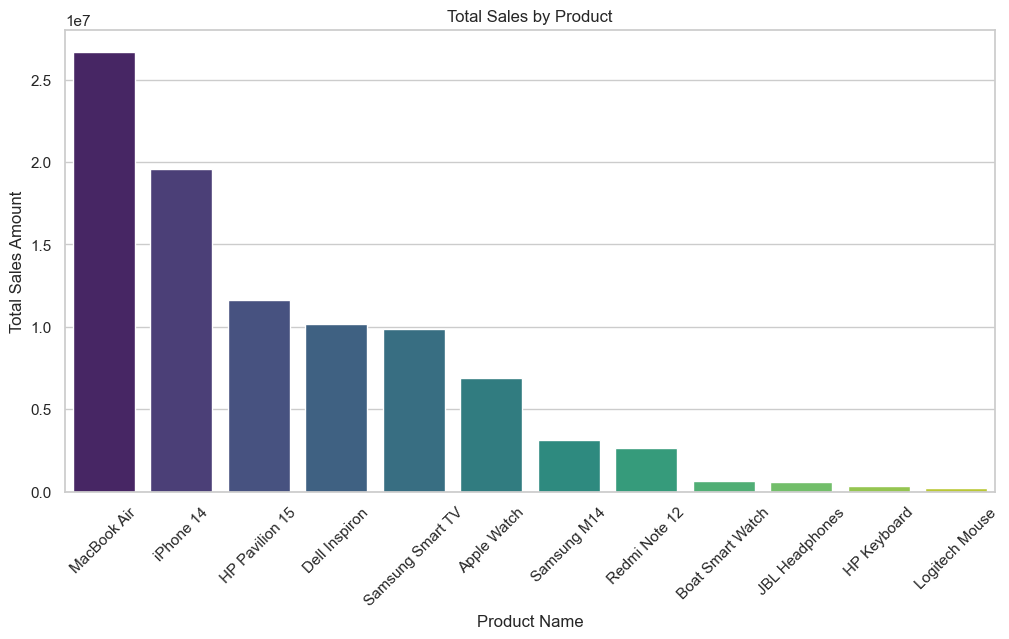

In [29]:
# Bar chart banane ke liye data prepare karo - total sales per product
product_sales = data.groupby('Product_Name')['Total_Price'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=product_sales.index, y=product_sales.values, palette='viridis')

plt.xticks(rotation=45)
plt.title('Total Sales by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Sales Amount')

plt.show()

Monthly Sales Trend ke liye Line Chart

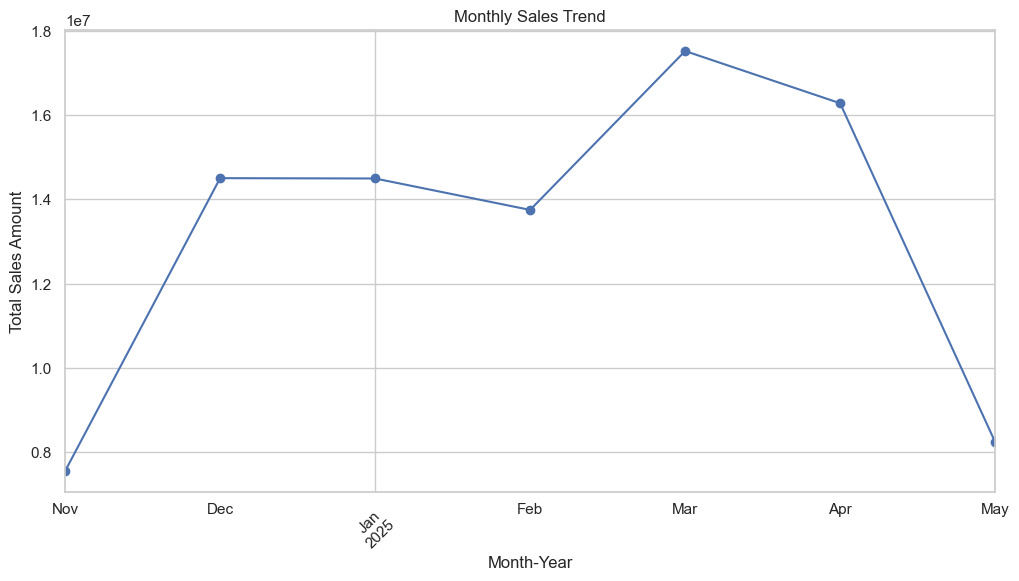

In [30]:
# Month-Year column banana
data['Month_Year'] = data['Date'].dt.to_period('M')

# Monthly sales ka total nikalna
monthly_sales = data.groupby('Month_Year')['Total_Price'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')

plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

 Gender-wise Sales Distribution (Pie Chart)

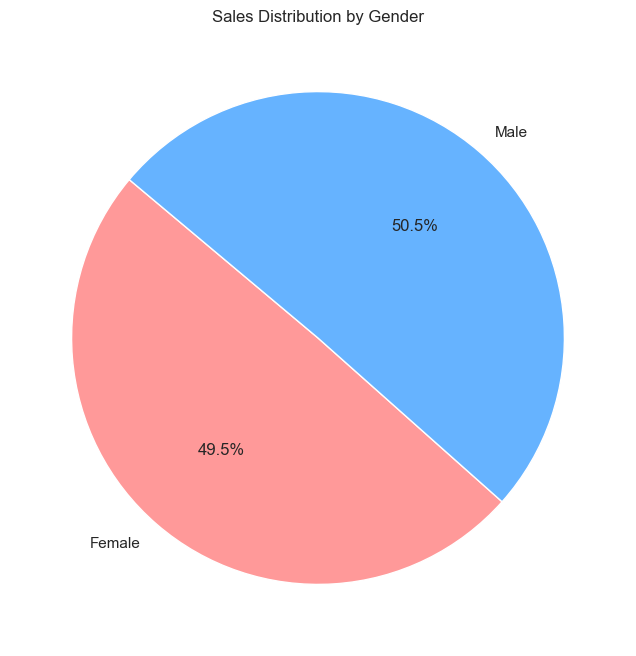

In [31]:
# Gender wise total sales
gender_sales = data.groupby('Gender')['Total_Price'].sum()

plt.figure(figsize=(8,8))
plt.pie(gender_sales, labels=gender_sales.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Sales Distribution by Gender')
plt.show()

Top 5 Locations ke Sales (Horizontal Bar Chart)

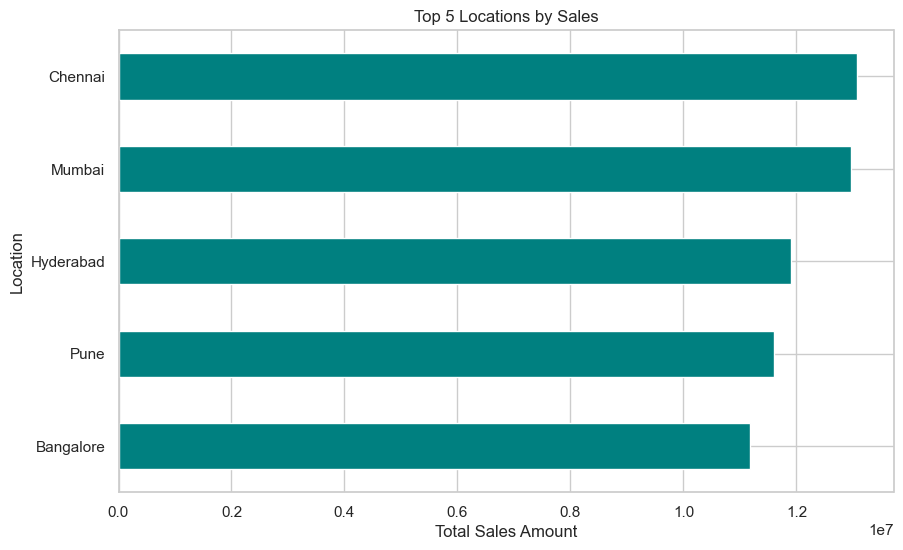

In [32]:
# Location wise sales
location_sales = data.groupby('Location')['Total_Price'].sum().sort_values(ascending=True).tail(5)

plt.figure(figsize=(10,6))
location_sales.plot(kind='barh', color='teal')
plt.title('Top 5 Locations by Sales')
plt.xlabel('Total Sales Amount')
plt.show()


 Payment Method Analysis (Countplot with Seaborn)

C:\Users\devanshu\AppData\Local\Temp\ipykernel_13412\2556302325.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




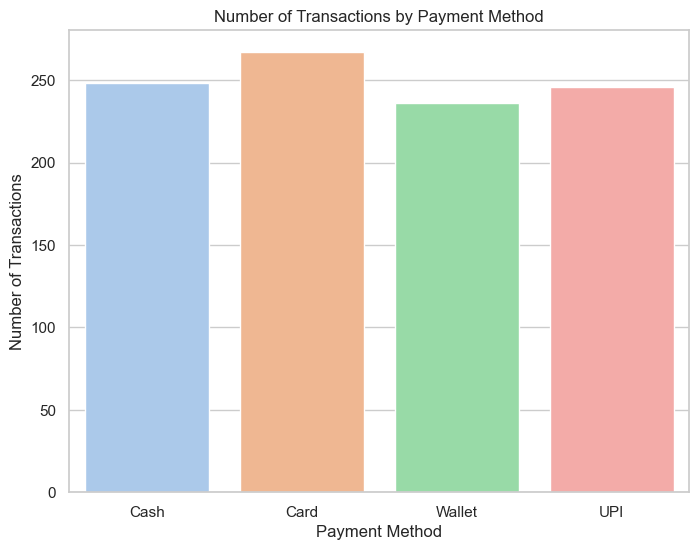

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Payment_Method', palette='pastel')
plt.title('Number of Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()


 Interactive Line Chart – Monthly Sales Trend by Product Category


In [ ]:
import plotly.express as px  # <-- Add this line if not already added

# Step 1: Ensure Date is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Step 2: Extract month-year for grouping
data['Month'] = data['Date'].dt.to_period('M').astype(str)

# Step 3: Group by Month and Category
monthly_sales = data.groupby(['Month', 'Category'])['Total_Price'].sum().reset_index()

# Step 4: Create interactive line chart
fig = px.line(monthly_sales, x='Month', y='Total_Price', color='Category',
              title='Interactive: Monthly Sales Trend by Category')

# Step 5: Sort months properly
fig.update_xaxes(type='category', categoryorder='category ascending')

# Step 6: Add dropdown menu to select category
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=[
                dict(label=cat,
                     method="update",
                     args=[
                         {"visible": [monthly_sales['Category'].unique().tolist().index(cat) == i for i in range(len(monthly_sales['Category'].unique()))]},
                         {"title": f"Monthly Sales Trend - {cat}"}
                     ])
                for cat in monthly_sales['Category'].unique()
            ],
            direction="down",
            showactive=True,
        )
    ]
)

fig.show()
